In [1]:
import gzip
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm

In [2]:
fontsize = 18
def hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    plt.figure(figsize=(8, 6))
    #bins = np.linspace(0, max(np.max(x1),np.max(x2)), 50) if predefined_bins else 'auto'
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    errors1 = np.sqrt(n1)
    plt.errorbar(bin_centers, n1, yerr=errors1, color='orange',fmt='none')
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    errors2 = np.sqrt(n2)
    plt.errorbar(bin_centers, n2, yerr=errors2, color='blue',fmt='none')
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


def hist2d(x,x_fs):
    fig,axes = plt.subplots(1,2,figsize=(10, 5), sharey = True,sharex=True)
    fig.tight_layout()
    h1, xedges, yedges, im1 = axes[0].hist2d(*x, bins=50, cmap='viridis', norm=LogNorm())
    axes[0].set_xlabel('$|P|$ [GeV]',fontsize=fontsize)
    axes[0].set_ylabel('$P_t$ [GeV]',fontsize=fontsize)
    axes[0].set_title('Independent Geant4',fontsize=fontsize)
    axes[1].hist2d(*x_fs, bins=[xedges, yedges], cmap='viridis', norm=LogNorm())
    axes[1].set_xlabel('$|P|$ [GeV]',fontsize=fontsize)
    axes[1].set_title('FairShip',fontsize=fontsize)
    fig.colorbar(im1, ax=axes,label='Counts')
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
        ax.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if any)


In [3]:
Muon_Geo = [-5732.0000, -3170.0000]
x_lims = [-3,3]
y_lims = [-5,5]

In [4]:
inputs_file = '../samples/subsample.pkl'
with gzip.open(inputs_file, 'rb') as f:
    inputs = pickle.load(f)
px_input,py_input,pz_input,x_input,y_input,z_input,charge_input = inputs.T

start_file = '../outputs/inputs_geant4.pkl'
with gzip.open(start_file, 'rb') as f:
    outputs_start = pickle.load(f)
px_start,py_start,pz_start,x_start,y_start,z_start,charge_start = outputs_start.T

outputs_file = '../outputs/outputs_geant4.pkl'
with gzip.open(outputs_file, 'rb') as f:
    outputs = pickle.load(f)
px,py,pz,x,y,z,charge = outputs.T

outputs_fs = '../outputs/outputs_fairship.pkl'
with gzip.open(outputs_fs, 'rb') as f:
    outputs_fs = pickle.load(f)
px_fs_start,py_fs_start,pz_fs_start,x_start,y_start,z_start,pdg,x_fs,y_fs,z_fs,px_fs,py_fs,pz_fs = outputs_fs.T

In [5]:
mask_x = np.logical_and(x<x_lims[1], x>x_lims[0])
mask_y = np.logical_and(y<y_lims[1],y>y_lims[0])
mask = np.logical_and(mask_x,mask_y)

mask_x = np.logical_and(x_fs<x_lims[1]*100, x_fs>x_lims[0]*100)
mask_y = np.logical_and(y_fs<y_lims[1]*100,y_fs>y_lims[0]*100)
mask_fs = np.logical_and(mask_x,mask_y)

In [6]:
px,py,pz,x,y,z,charge = outputs[mask].T
px_start,py_start,pz_start,x_start,y_start,z_start,charge_start = outputs_start[mask].T
px_fs_start,py_fs_start,pz_fs_start,x_start,y_start,z_start,pdg,x_fs,y_fs,z_fs,px_fs,py_fs,pz_fs = outputs_fs[mask_fs].T
x_start,y_start,z_start,x_fs,y_fs,z_fs = x_start/100,y_start/100,z_start/100,x_fs/100,y_fs/100,z_fs/100

In [7]:
pt_input = np.sqrt(px_input**2+py_input**2)
P_input = np.sqrt(pt_input**2+pz_input**2)

pt = np.sqrt(px**2+py**2)
P = np.sqrt(pt**2+pz**2)

pt_fs = np.sqrt(px_fs**2+py_fs**2)
P_fs = np.sqrt(pt_fs**2+pz_fs**2)

pt_fs_start = np.sqrt(px_fs_start**2+py_fs_start**2)
P_fs_start = np.sqrt(pt_fs_start**2+pz_fs_start**2)

pt_start = np.sqrt(px_start**2+py_start**2)
P_start = np.sqrt(pt_start**2+pz_start**2)

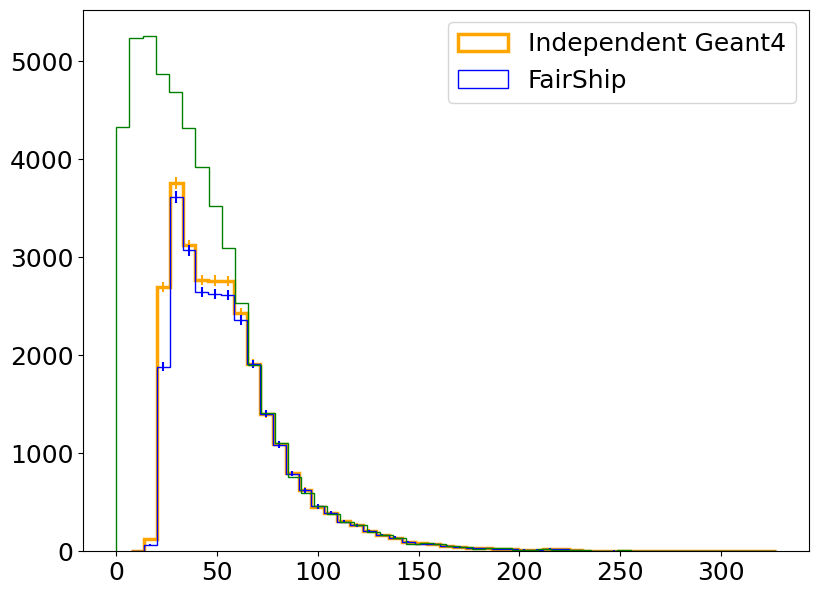

In [8]:
hist1d(P_start, P_fs_start,density=False,bins = 50)
plt.hist(P_input, bins=50, density=False, histtype='step', label='FairShip', color='green')
plt.show()

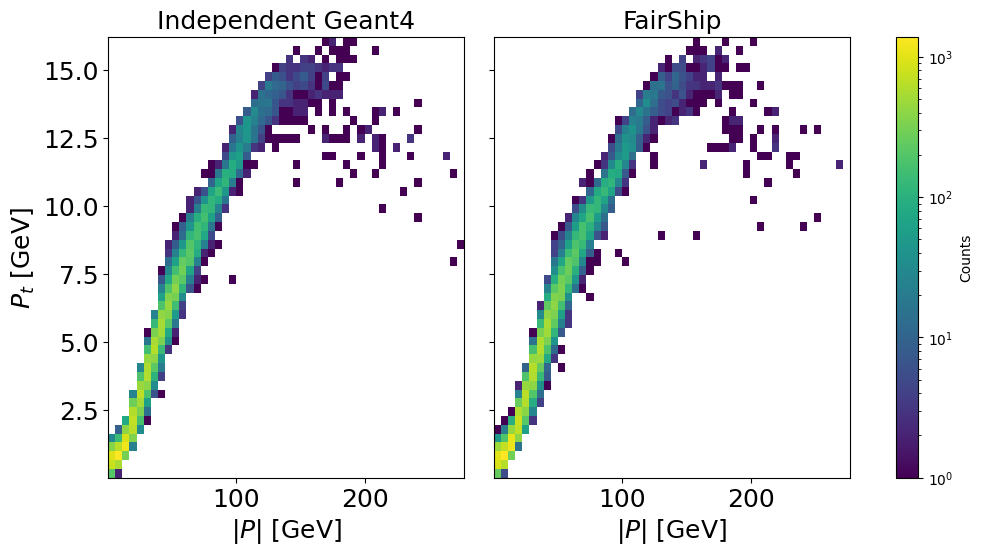

In [9]:
hist2d((P,pt),(P_fs,pt_fs))

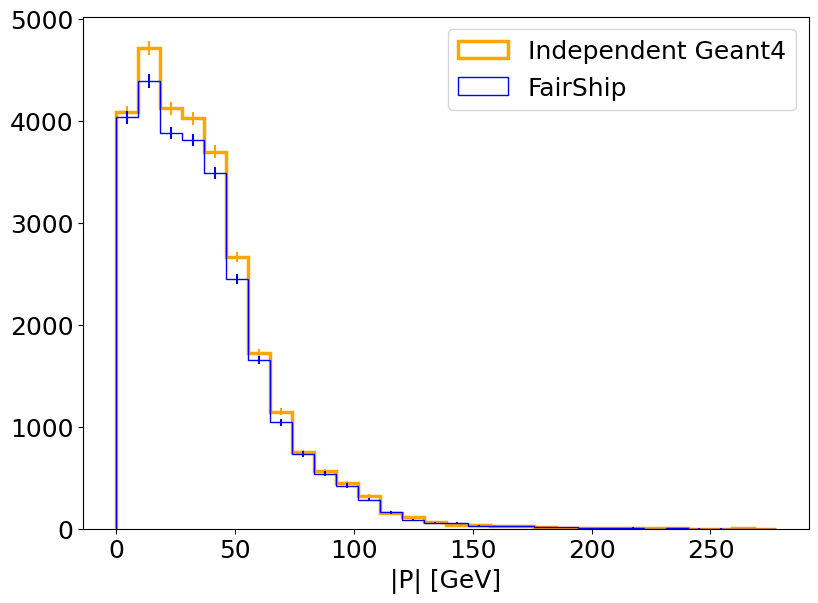

In [10]:
hist1d(P,P_fs, '|P| [GeV]', density=False, bins = 30)

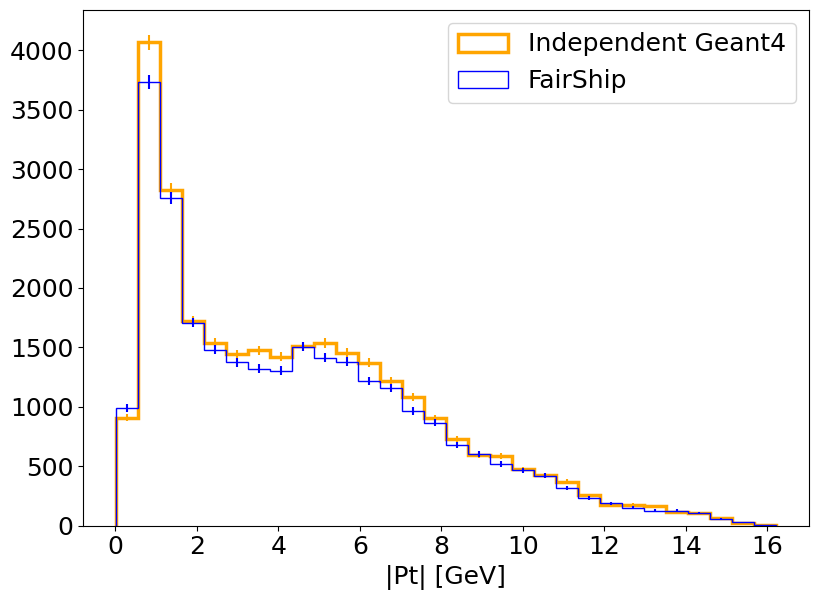

In [11]:
hist1d(pt,pt_fs, '|Pt| [GeV]',density=False,bins = 30)

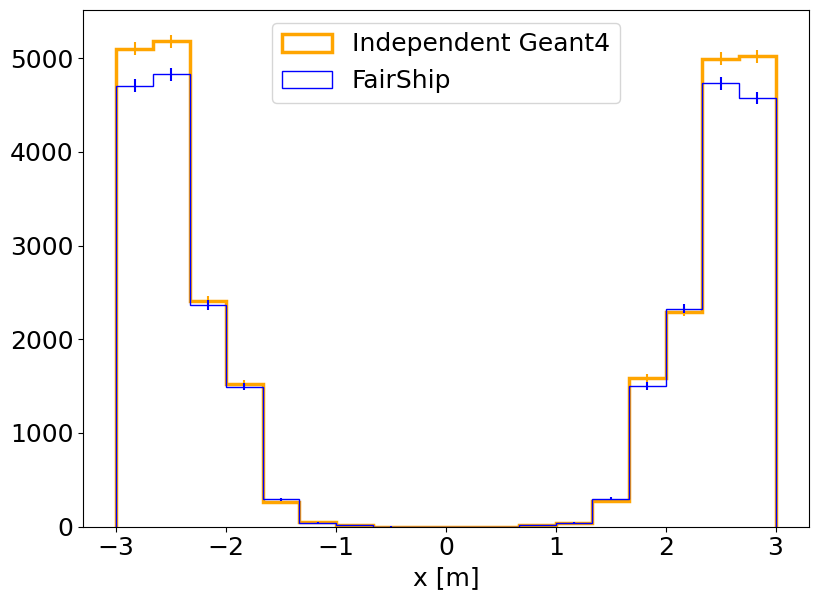

In [12]:
hist1d(x,x_fs, 'x [m]',density=False)

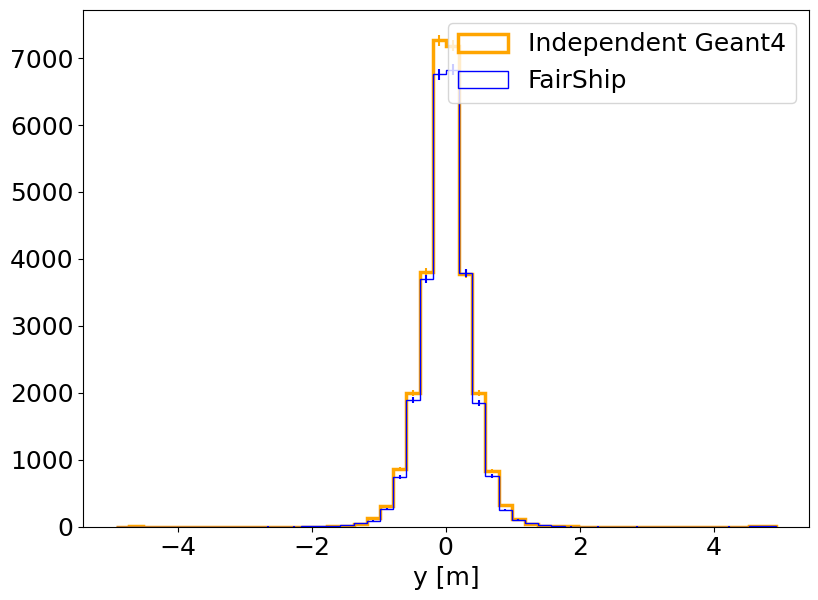

In [13]:
hist1d(y,y_fs, 'y [m]',bins = 50, density=False)